### SQL Opearations with DataFrame
Will use Titanic Dataset for Practice

In [15]:
import pandas as pd
import numpy as np
path = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/'
data = pd.read_csv(path + "titanic.csv")
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


#### SELECT

In [3]:
#SELECT Survived, Pclass, Name FROM data LIMIT 5;
data[['Survived', 'Pclass', 'Name']].head()

,Survived,Pclass,Name
0,0,3,Mr. Owen Harris Braund
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...
2,1,3,Miss. Laina Heikkinen
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle
4,0,3,Mr. William Henry Allen


#### WHERE

In [4]:
#SELECT * FROM data WHERE Sex = 'male' LIMIT 5
data[data['Sex'] == 'male'].head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750


#### OR - AND Operations

In [7]:
#SELECT * FROM data WHERE Sex = 'Male' AND Age > 5.00;
data[(data['Sex']=='male') & (data['Age'] > 5)].head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
12,0,3,Mr. William Henry Saundercock,male,20.0,0,0,8.0500


#### GROUPBY
It is usufull for categorical datas

In [10]:
# SELECT Sex, count(*) FROM data GROUP BY Sex;
data.groupby('Sex').size()

Sex
female    314
male      573
dtype: int64

In [11]:
#Same thing can be explained in value_counts
data['Sex'].value_counts()

male      573
female    314
Name: Sex, dtype: int64

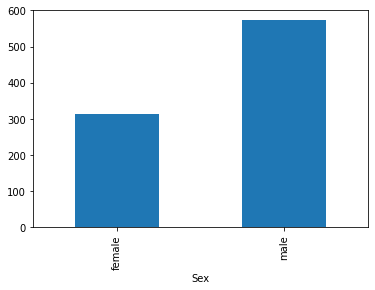

In [13]:
_ = data.groupby('Sex').size().plot(kind='bar')

### JOIN Opearations

#### INNER JOIN
Shows only common data between two sets (A n B)

In [16]:
df1 = pd.DataFrame({'key': ['A', 'B', 'C', 'D'],
                     'value': np.random.randn(4)})

df2 = pd.DataFrame({'key': ['B', 'D', 'D', 'E'],
                     'value': np.random.randn(4)})

In [17]:
df1

,key,value
0,A,-0.259312
1,B,1.221614
2,C,-0.387670
3,D,0.077870


In [18]:
df2

,key,value
0,B,1.225914
1,D,1.665989
2,D,0.253406
3,E,0.204179


In [23]:
# Select * from df1 inner join df2 on df1.key = df2.key;
pd.merge(df1, df2, how='inner', on='key')

,key,value_x,value_y
0,B,1.221614,1.225914
1,D,0.077870,1.665989
2,D,0.077870,0.253406


In [24]:
#Its same as above
pd.merge(df1, df2, on='key')

,key,value_x,value_y
0,B,1.221614,1.225914
1,D,0.077870,1.665989
2,D,0.077870,0.253406


#### LEFT Outer Join
This operation helps us join the datasets using a clause. With the help of this, we can preserve the unmatched rows of the left data and join them with a NULL row in the shape of the right table.

- Shows A and B common data
- Shows all A data with Null value for corresponding B data

In [21]:
# SELECT * FROM df1 LEFT OUTER JOIN df2 ON df1.key = df2.key;
pd.merge(df1, df2, how='left', on='key')

,key,value_x,value_y
0,A,-0.259312,NaN
1,B,1.221614,1.225914
2,C,-0.387670,NaN
3,D,0.077870,1.665989
4,D,0.077870,0.253406


#### RIGHT Outer Join
- Shows all common data between A and B
- Shows all B data and put a Null for corresponding A data

In [25]:
# SELECT * from df1 right outer join df2 on df1.key=df2.key
pd.merge(df1, df2, how='right', on='key')

,key,value_x,value_y
0,B,1.221614,1.225914
1,D,0.077870,1.665989
2,D,0.077870,0.253406
3,E,NaN,0.204179


#### FULL Join or FULL Outer Join
This operation preserves all the rows of every data while joining them.

In [27]:
# select * from df1 full outer join df2 on df1.key=df2.key
pd.merge(df1, df2, how='outer', on='key')

,key,value_x,value_y
0,A,-0.259312,NaN
1,B,1.221614,1.225914
2,C,-0.387670,NaN
3,D,0.077870,1.665989
4,D,0.077870,0.253406
5,E,NaN,0.204179


#### For reference please look below article¶
https://www.analyticsvidhya.com/blog/2020/02/joins-in-pandas-master-the-different-types-of-joins-in-python/